In [1]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [ ]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)

In [68]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3] # การเข้าถึง ท่อนแบ่งด้วย /
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 100/100 [00:17<00:00,  5.56it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [145]:
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                                   include_top=False,
                                                   weights='imagenet')
mobilenetModel.trainable = False
num_classes = 8

mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(num_classes, activation='softmax'))
mobilenetModelModify.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 128)         1474688   
                                                                 
 dense_8 (Dense)             (None, 2, 2, 16)          2064      
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                                 
Total params: 3,735,256
Trainable params: 1,477,272
Non-trainable params: 2,257,984
____________________________________

In [146]:
mobilenetModelModify.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [147]:
mobilenetModelModify.fit(x_train, y_train, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
320/320 [==============================] - 32s 84ms/step - loss: 0.0582 - accuracy: 0.9563
Epoch 2/10
320/320 [==============================] - 27s 84ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 3/10
320/320 [==============================] - 27s 84ms/step - loss: 2.2401e-04 - accuracy: 1.0000
Epoch 4/10
320/320 [==============================] - 27s 84ms/step - loss: 4.9673e-05 - accuracy: 1.0000
Epoch 5/10
320/320 [==============================] - 26s 82ms/step - loss: 2.4419e-05 - accuracy: 1.0000
Epoch 6/10
320/320 [==============================] - 25s 80ms/step - loss: 1.7944e-05 - accuracy: 1.0000
Epoch 7/10
320/320 [==============================] - 26s 80ms/step - loss: 1.3943e-05 - accuracy: 1.0000
Epoch 8/10
320/320 [==============================] - 26s 81ms/step - loss: 1.1108e-05 - accuracy: 1.0000
Epoch 9/10
320/320 [==============================] - 25s 80ms/step - loss: 9.0391e-06 - accuracy: 1.0000
Epoch 10/10
320/320 [==============================] -

In [148]:
y_pred = mobilenetModelModify.predict(x_test)
y_pred = np.argmax(y_pred ,axis=1)
print(len(y_pred))
print(y_pred)

25/25 [==============================] - 6s 182ms/step


In [144]:
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

array_1d = convert_to_1d_array(y_pred)
print(array_1d)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 

In [161]:
# Create an empty array with 800 elements
array = np.zeros(800, dtype=int)

# Assign the values 0-7 to the first 100 elements, 100 times
for i in range(8):
    array[i*100:(i+1)*100] = i

# Print the array
print(len(array))

800


In [182]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report


# Example true labels and predicted labels
true_labels = [0, 1, 2, 2, 1, 0, 0, 1, 2, 2]
predicted_labels = [0, 0, 2, 2, 2, 0, 0, 1, 2, 1]

# Create a confusion matrix
confusion_matrix = confusion_matrix(array, array_1d)
# Accuracy_score
accuracy_score = accuracy_score(array, array_1d)
# Recall_score
recall_score = recall_score(array, array_1d, average='macro')
# F1_score
f1_score = f1_score(array, array_1d, average='macro')
# Classification_report
classification_report = classification_report(array, array_1d)

# Print resault
print(confusion_matrix)
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(classification_report)

[[100   0   0   0   0   0   0   0]
 [  0  96   4   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0]
 [  0   0   0  78  22   0   0   0]
 [  0   0   0   0 100   0   0   0]
 [  6   0   0  18   0  70   0   6]
 [  0   0   0   0   0   0 100   0]
 [  0   0   0  14   0   0   0  86]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       100
           1       1.00      0.96      0.98       100
           2       0.96      1.00      0.98       100
           3       0.71      0.78      0.74       100
           4       0.82      1.00      0.90       100
           5       1.00      0.70      0.82       100
           6       1.00      1.00      1.00       100
           7       0.93      0.86      0.90       100

    accuracy                           0.91       800
   macro avg       0.92      0.91      0.91       800
weighted avg       0.92      0.91      0.91       800



In [74]:
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 42
epochs = 10
history = mobilenetModelModify.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test), verbose=1, validation_split=0.2)

Epoch 1/10
77/77 [==============================] - 39s 393ms/step - loss: 0.3902 - accuracy: 0.9309 - val_loss: 1.0599 - val_accuracy: 0.7812
Epoch 2/10
77/77 [==============================] - 27s 347ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.6902 - val_accuracy: 0.8350
Epoch 3/10
77/77 [==============================] - 26s 340ms/step - loss: 2.0296e-04 - accuracy: 1.0000 - val_loss: 0.6059 - val_accuracy: 0.8438
Epoch 4/10
77/77 [==============================] - 27s 346ms/step - loss: 8.8785e-05 - accuracy: 1.0000 - val_loss: 0.4940 - val_accuracy: 0.8750
Epoch 5/10
77/77 [==============================] - 27s 347ms/step - loss: 5.4590e-05 - accuracy: 1.0000 - val_loss: 0.4726 - val_accuracy: 0.8850
Epoch 6/10
77/77 [==============================] - 26s 332ms/step - loss: 4.5454e-05 - accuracy: 1.0000 - val_loss: 0.4600 - val_accuracy: 0.8850
Epoch 7/10
77/77 [==============================] - 27s 351ms/step - loss: 3.8958e-05 - accuracy: 1.0000 - val_loss: 0.4460 - 

<function matplotlib.pyplot.show(close=None, block=None)>

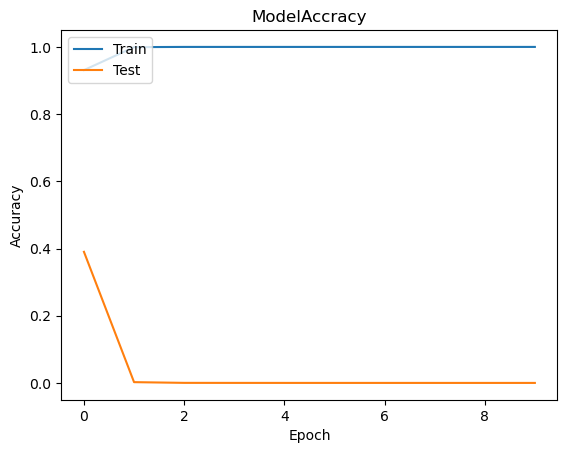

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('ModelAccracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show